Data Description: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [1]:
import pandas as pd 
from pandas import DataFrame
import numpy as np

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning & Preparation

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# find out the nan values of original data
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
# delete columns that our group agreed on
df_clean=df.drop(columns=['company','agent','meal','required_car_parking_spaces', 'babies', 'assigned_room_type',
                          'customer_type', 'reservation_status', 'previous_bookings_not_canceled', 
                          'days_in_waiting_list', 'arrival_date_year',"arrival_date_week_number", 
                          "arrival_date_day_of_month", "reservation_status_date", "adr"])

In [5]:
for i, v in enumerate(df_clean['country']):
    if v == 'PRT':
        df_clean.loc[i, 'origin_Portugal'] = 1
    else:
        df_clean.loc[i, 'origin_Portugal'] = 0

In [6]:
for i, v in enumerate(df_clean['reserved_room_type']):
    if v == 'A':
        df_clean.loc[i, 'reserved_standard_room'] = 1
    else:
        df_clean.loc[i, 'reserved_standard_room'] = 0

In [7]:
for i, v in enumerate(df_clean['booking_changes']):
    if v == 0:
        df_clean.loc[i, 'made_booking_changes'] = 0
    else:
        df_clean.loc[i, 'made_booking_changes'] = 1

In [8]:
for i, v in enumerate(df_clean['total_of_special_requests']):
    if v == 0:
        df_clean.loc[i, 'made_special_requests'] = 0
    else:
        df_clean.loc[i, 'made_special_requests'] = 1

In [9]:
for i, v in enumerate(df_clean['adults']):
    if v == 1:
        df_clean.loc[i, 'come_alone'] = 1
    else:
        df_clean.loc[i, 'come_alone'] = 0

In [10]:
for i, v in enumerate(df_clean['children']):
    if v == 0:
        df_clean.loc[i, 'with_chilren'] = 0
    else:
        df_clean.loc[i, 'with_chilren'] = 1

In [11]:
for i, v in enumerate(df_clean['deposit_type']):
    if v == 'No Deposit':
        df_clean.loc[i, 'no_deposit'] = 1
    else:
        df_clean.loc[i, 'no_deposit'] = 0

In [12]:
for i, v in enumerate(df_clean['distribution_channel']):
    if v == 'TA/TO':
        df_clean.loc[i, 'travel_agents/tour_operators_distributed'] = 1
        df_clean.loc[i, 'direct_distributed'] = 0
    elif v == 'Direct':
        df_clean.loc[i, 'travel_agents/tour_operators_distributed'] = 0
        df_clean.loc[i, 'direct_distributed'] = 1
    else:
        df_clean.loc[i, 'travel_agents/tour_operators_distributed'] = 0
        df_clean.loc[i, 'direct_distributed'] = 0

In [13]:
for i, v in enumerate(df_clean['market_segment']):
    if v == 'Online TA':
        df_clean.loc[i, 'online_purchased'] = 1
    else:
        df_clean.loc[i, 'online_purchased'] = 0

In [15]:
winter_season = ['November','December','January','Feburary']
peak_season = ['June', 'July' ,'August']

for i, v in enumerate(df_clean['arrival_date_month']):
    if v in winter_season:
        df_clean.loc[i, 'arrival_winter_season'] = 1
        df_clean.loc[i, 'arrival_peak_season'] = 0
    elif v in peak_season:
        df_clean.loc[i, 'arrival_peak_season'] = 1
        df_clean.loc[i, 'arrival_winter_season'] = 0
    else:
        df_clean.loc[i, 'arrival_winter_season'] = 0
        df_clean.loc[i, 'arrival_peak_season'] = 0

In [16]:
for i, v in enumerate(df_clean["previous_cancellations"]):
    if v == 0:
        df_clean.loc[i, 'has_previous_cancellations'] = 0
    else:
        df_clean.loc[i, 'has_previous_cancellations'] = 1
        

In [17]:
for i, v in enumerate(df_clean['hotel']):
    if v == 'Resort Hotel':
        df_clean.loc[i, 'city_hotel'] = 0
    if v == 'City Hotel':
        df_clean.loc[i, 'city_hotel'] = 1

In [18]:
# standardize numerical variables
ncategories=['lead_time', 'stays_in_weekend_nights','stays_in_week_nights' ]

df_clean['lead_time'] = (df_clean['lead_time'] - df_clean['lead_time'].mean()) / df_clean['lead_time'].std()

df_clean['stays_in_week_nights'] = (df_clean['stays_in_week_nights'] - df_clean['stays_in_week_nights'].mean()) / df_clean['stays_in_week_nights'].std()

df_clean['stays_in_weekend_nights'] = (df_clean['stays_in_weekend_nights'] - df_clean['stays_in_weekend_nights'].mean()) / df_clean['stays_in_weekend_nights'].std()


In [19]:
# clean up the original columns after creating the dummy ones
df_clean=df_clean.drop(columns=['country','reserved_room_type','booking_changes','total_of_special_requests',
                                'adults','children','deposit_type','distribution_channel','market_segment',
                               'hotel', 'arrival_date_month', 'previous_cancellations'])


In [27]:
df_clean.isna().sum()

is_canceled                                 0
lead_time                                   0
stays_in_weekend_nights                     0
stays_in_week_nights                        0
is_repeated_guest                           0
origin_Portugal                             0
reserved_standard_room                      0
made_booking_changes                        0
made_special_requests                       0
come_alone                                  0
with_chilren                                0
no_deposit                                  0
travel_agents/tour_operators_distributed    0
direct_distributed                          0
online_purchased                            0
arrival_peak_season                         0
arrival_winter_season                       0
has_previous_cancellations                  0
city_hotel                                  0
dtype: int64

In [28]:
df_clean.shape

(119390, 19)

In [22]:
df_clean

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,origin_Portugal,reserved_standard_room,made_booking_changes,made_special_requests,come_alone,with_chilren,no_deposit,travel_agents/tour_operators_distributed,direct_distributed,online_purchased,arrival_peak_season,arrival_winter_season,has_previous_cancellations,city_hotel
0,0,2.227042,-0.928887,-1.310234,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0,5.923360,-0.928887,-1.310234,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,-0.907810,-0.928887,-0.786204,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.851664,-0.928887,-0.786204,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,-0.842306,-0.928887,-0.262173,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,-0.758086,1.073890,1.309918,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
119386,0,-0.018822,1.073890,1.309918,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
119387,0,-0.655151,1.073890,1.309918,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
119388,0,0.046682,1.073890,1.309918,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [29]:
df_clean.to_csv('Hotel Cancellation.csv')

Text(0.5, 1, 'Diagonal Correlation Matrix')

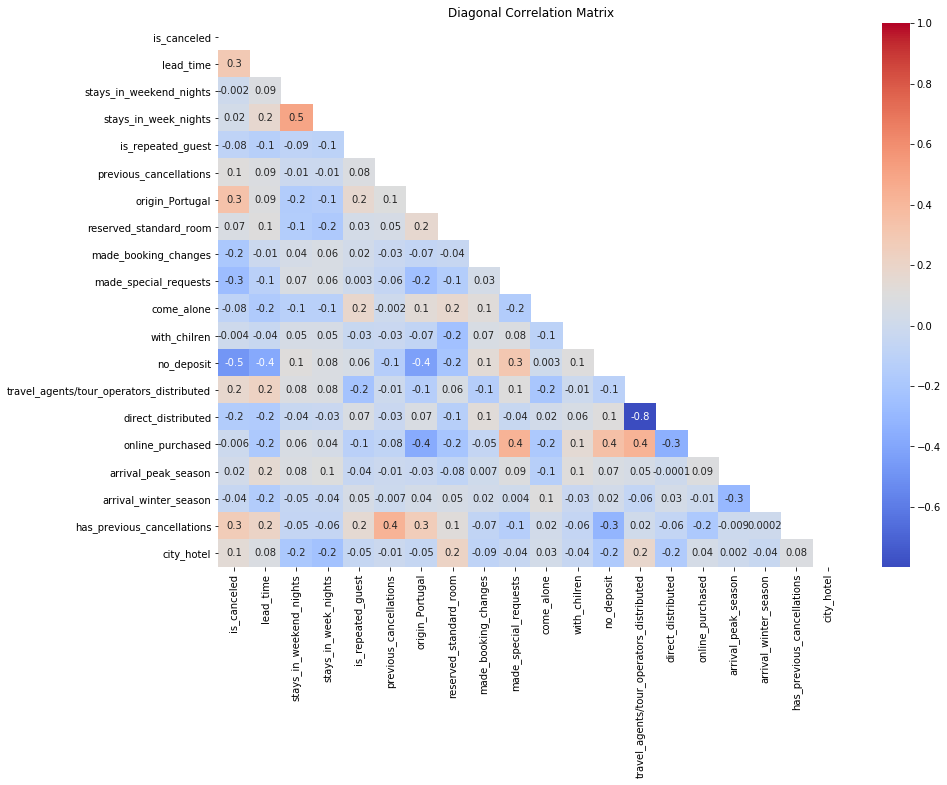

In [24]:
matrix = np.triu(df_clean.corr())
plt.figure(figsize=(14,10))
sns.heatmap(df_clean.corr(),annot = True,fmt='.1g',cmap= 'coolwarm', mask=matrix)
plt.title("Diagonal Correlation Matrix")

In [26]:
df_clean["arrival_winter_season"].value_counts()

0.0    99887
1.0    19503
Name: arrival_winter_season, dtype: int64